## Dataset: conjunto completo de dados de Pokémon

### Overview
Essa é uma análise exploratória acerca do conjunto de dados que contém informações sobre todos os 802 Pokémon de todas as Sete Gerações de Pokémon. As informações contidas neste conjunto incluem estatísticas básicas, desempenho em relação a outros tipos, altura, peso, classificação, pontos de experiência, habilidades, etc. Esses dados podem ser encontrados em: https://www.kaggle.com/datasets/rounakbanik/pokemon. 

### Carregamento de dados

In [21]:
import pandas as pd

df = pd.read_csv('pokemon.csv')

## Primeira análise: Qual a relação entre o tamanho e os atributos de poder de um Pokémon? Ser maior implica em ser mais forte?

In [27]:
#Seleção e tratamento das colunas utilizadas para essa análise
#Aqui, optamos por ignorar os dados nulos e apenas dropar eles

data= df[['sp_attack', 'sp_defense', 'speed', 'attack', 'type1', 'height_m']]
data=data.dropna()

### Pair plot
Matriz de gráficos de dispersão entre cada par de variáveis onde analisamos a relação ao identificar agrupamentos de dados que seguem um padrão. Analisando a altura e os atributos de poder esperamos que os pares de variáveis que se correlacionam fortemente apresentem um padrão de agrupamento e baixa dispersão.

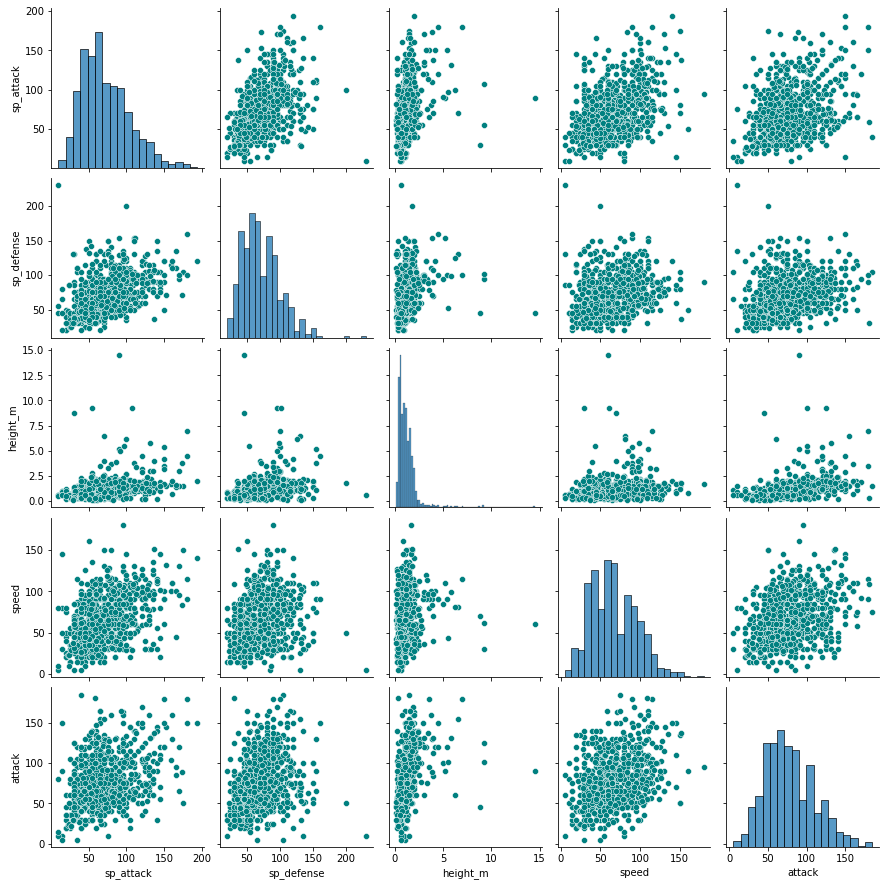

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[['sp_attack', 'sp_defense', 'height_m', 'speed','attack']], plot_kws={'color': 'teal'})
plt.show()

Podemos notar na matriz que a altura tem correlações positivas de fracas a moderadas com outros atributos, sugerindo que, embora Pokémon mais altos possam ter melhores atributos, a relação não é muito forte. A altura dos Pokémons está fortemente concentrada em valores baixos, com poucos Pokémons altos.

Além disso, registramos outras informações interessantes entre os atributos, há correlações positivas moderadas entre atributos de ataque (sp_attack e attack) e velocidade, sugerindo que Pokémons mais rápidos tendem a ter maiores atributos de ataque.Entre ataque especial e defesa especial também existe uma correlação moderada, indicando que Pokémons com um desses atributos elevados tendem a ter o outro elevado.

### Analisando a correlação numericamente a partir de um mapa de calor (heat map)


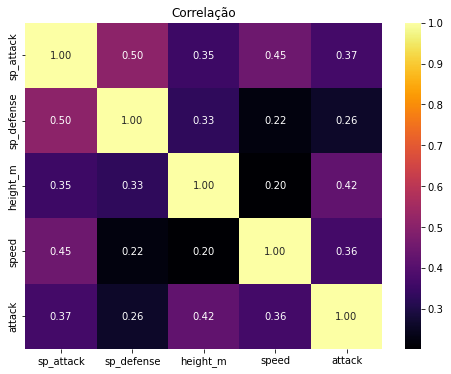

In [29]:
correlacao = data[['sp_attack', 'sp_defense',  'height_m', 'speed','attack']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='inferno', fmt=".2f")
plt.title('Correlação')
plt.show()

Aqui podemos entender melhor as correlações quantitativamente e atestar a veracidade dos pontos levantados acima. Vemos uma correlação moderada para sp_attack e sp_defense, speed e sp_attack, height e attack. O restante performa como interações fracas entre as variáveis. 

### Entendendo como o crescimento de uma variável impacta na outra

Como um último teste para análise de correlação, fiz um modelo simples de regressão linear para as variáveis que melhor se correlacionaram visando o objetivo dessa primeira análise, attack e height_m. Meu objetivo aqui é analisar se uma variável colocada como independente (neste caso, o ataque) pode explicar bem a variabilidade da variável dependente (altura). Para isso, utilizei a biblioteca statsmodels que é bem utilizada para análises estatísticas e construção de modelos de regressão.

In [30]:
import statsmodels.api as sm

X = data['attack']
y = data['height_m']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               height_m   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 25 May 2024   Prob (F-statistic):           2.82e-35
Time:                        16:31:22   Log-Likelihood:                -1091.0
No. Observations:                 781   AIC:                             2186.
Df Residuals:                     779   BIC:                             2195.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0617      0.092      0.674      0.5

Esse resultado tem algumas saídas interessantes, porém vamos nos concentrar no R-squared (métrica usada para avaliar a qualidade do ajuste do modelo). Aqui, um R-squared alto indica que o ataque é um bom preditor da altura, mas o que vemos é 18% de significância, ou seja, o ataque não explica bem a variação na altura e outros fatores podem estar influenciando.

<div style="text-align: center; color: red;">
    <h2>Conclusão: ser um Pokémon alto não significa ser mais forte no jogo.</h2>
</div>


## Segunda análise: Como a distribuição de gênero varia entre os tipos de Pokémon? Existe uma diferença nos atributos entre Pokémons machos e fêmeas?

### Gráfico de barras

Para entender a distribuição de gênero entre os tipos de Pokémons, nada mais adequado do que um gráfico de barras.

/tmp/ipykernel_9426/900637462.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genero['percentage_male'] = pd.to_numeric(df_genero['percentage_male'])


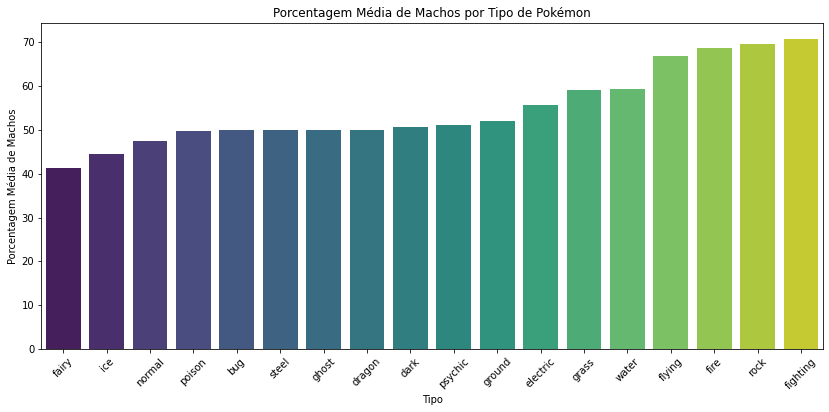

In [35]:
# exclusão dos nulos e agrupamento dos dados pela coluna de tipo
#Para a coluna de percentage_male foi feito uma média de cada grupo

df_genero = df.dropna(subset=['percentage_male'])
df_genero['percentage_male'] = pd.to_numeric(df_genero['percentage_male'])
dist_genero = df_genero.groupby('type1')['percentage_male'].mean().sort_values()


plt.figure(figsize=(14, 6))
sns.barplot(x=dist_genero.index, y=dist_genero.values, palette="viridis")
plt.title('Porcentagem Média de Machos por Tipo de Pokémon')
plt.xlabel('Tipo')
plt.ylabel('Porcentagem Média de Machos')
plt.xticks(rotation=45)
plt.show()


Vemos que Fairy tem a menor porcentagem média de machos, abaixo de 40%, enquanto Fighting tem a maior porcentagem média de machos, próximo de 70%.

### Boxplot
Para analisar se existe diferença entre atributos de Pokémons machos e fêmeas, o boxplot vai ajudar no resumo e visualização da distribuição do nosso conjunto de dados de gênero e poder.

/tmp/ipykernel_9426/183773549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genero['genero'] = df_genero['percentage_male'].apply(lambda x: 'male' if x > 50 else 'female')


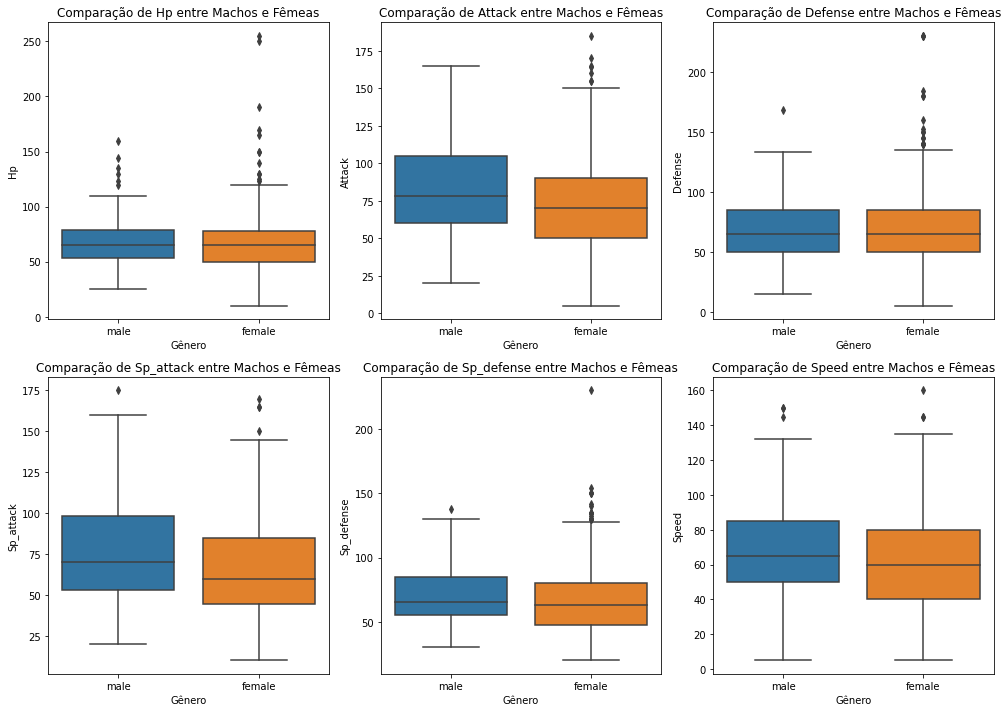

In [37]:
#criando uma coluna para gênero
df_genero['genero'] = df_genero['percentage_male'].apply(lambda x: 'male' if x > 50 else 'female')
atributos = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

plt.figure(figsize=(14, 10))

for i, atributos in enumerate(atributos, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='genero', y=atributos, data=df_genero)
    plt.title(f'Comparação de {atributos.capitalize()} entre Machos e Fêmeas')
    plt.xlabel('Gênero')
    plt.ylabel(atributos.capitalize())

plt.tight_layout()
plt.show()

Notamos que Pokémons machos tendem a ter valores médios maiores em atributos de ataque (Attack e Sp_attack) e velocidade (Speed) do que as fêmeas, com maior variação e mais outliers.
Em relação ao HP, Pokémons machos também tendem a ter um HP médio maior do que as fêmeas, com uma dispersão maior e mais outliers.
Nos atributos de defesa (Defense e Sp. Defense), a diferença entre machos e fêmeas é menos pronunciada, embora machos ainda tenham uma mediana ligeiramente maior e mais variação em alguns casos.

<div style="text-align: center; color: red;">
    <h2>Conclusão: Pokémons machos têm valores mais altos para vários atributos de batalha em comparação com as fêmeas, exceto nos atributos de defesa onde a diferença é menor.</h2>
</div>